## EDA and Visualization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The factors that might affect the health insurance cost are:-
* **Age**: Age of the beneficiary
* **Sex**: Gender of the beneficiary
* **BMI**: Body Mass Index (kg / m^2)
* **Children**: Number of children / Number of dependants
* **Smoker**: Does smoke or not
* **Region**: Residential area of the beneficiary

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The datatype of the all the categories are correct, hence no changes needed. Also, there are no null valued elements

In [6]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

This shows a brief description of the Charges column.<br>
Few observations:-
* The minimum cost of an insurance is 1122
* Around 75% of the charges are below 17,000
* The maximum cost of an insurance is 63770

Let's analyze the medical insurance charges by age, bmi and children according to the smoking factor

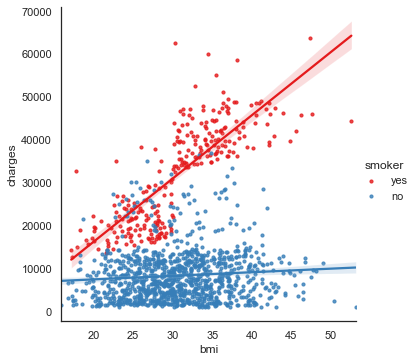

In [135]:
sns.lmplot( x='bmi',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

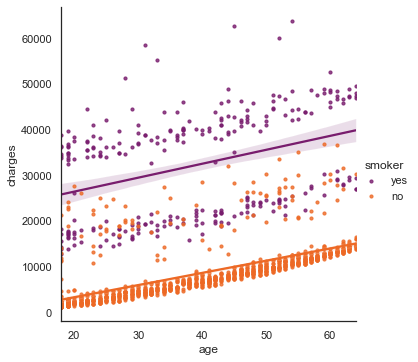

In [136]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, palette='inferno', scatter_kws={"s": 10})
plt.show()

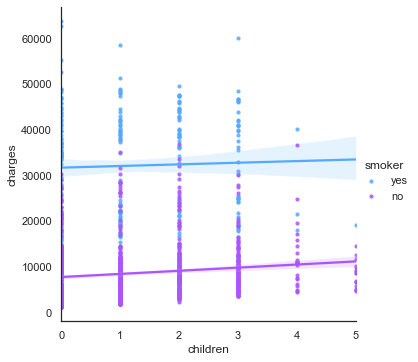

In [138]:
sns.lmplot(x='children', y='charges', hue='smoker', data=df, palette='cool', scatter_kws={"s": 10})
plt.show()

Smoking has the highest impact on the medical insurance costs, even though costs are increasing with age, bmi and children. Also people with children tend to smoke less.

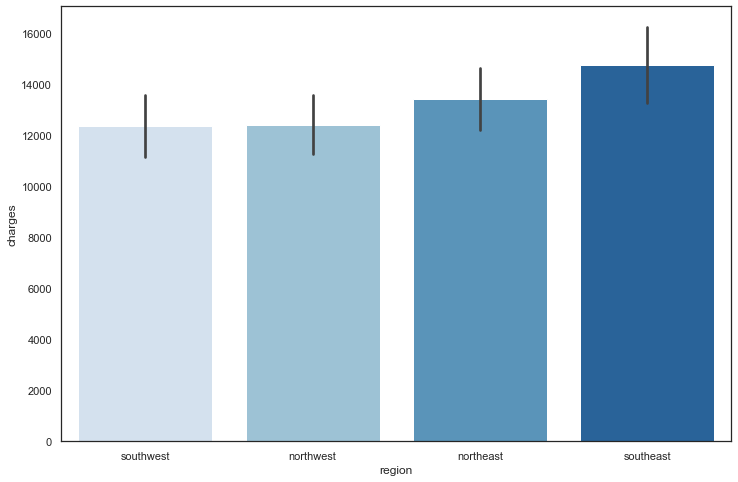

In [72]:
f, axs = plt.subplots(1,1, figsize=(12,8))
plot_order = df.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)
plt.show()

So overall the highest medical insurance charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

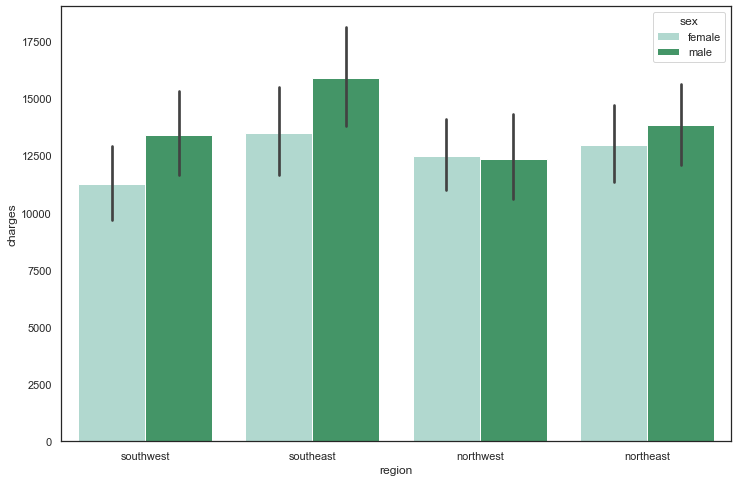

In [77]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='BuGn')
plt.show()

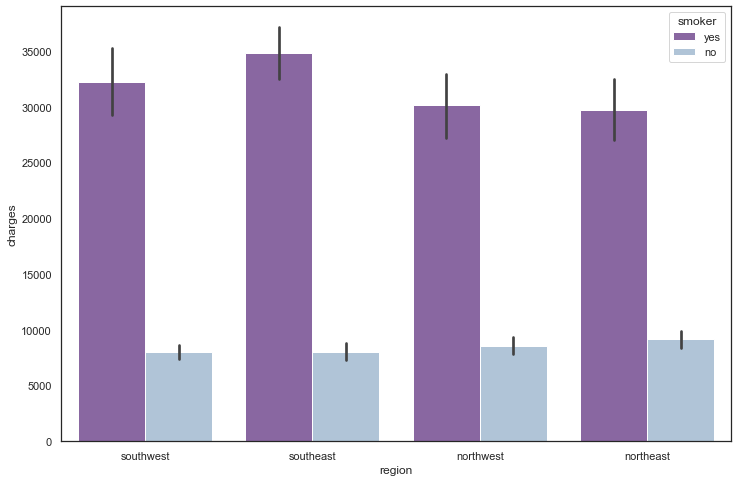

In [93]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

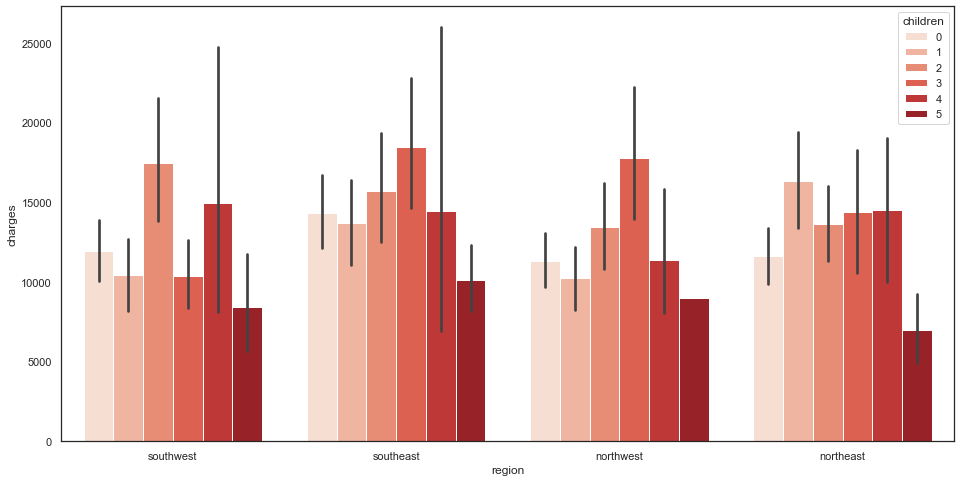

In [100]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')
plt.show()

From the above graphs we can say that the highest charges are still in Southeast. People in Southeast smoke more than people in Northeast, but people in Northeast have higher charges by gender than in Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.